In [8]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

city = 'gdansk'
url = 'https://www.olx.pl/nieruchomosci/mieszkania/sprzedaz/{}/?page='.format(city)

columns = ['Title', 'Price', 'Sq_Footage', 'Price_Per_Meter']
df = pd.DataFrame(columns=columns)
cards = None

In [9]:
pages = 15
for page_index in range(pages):
	next_url = url + str(page_index + 1)
	response = requests.get(next_url)

	if response.status_code == 200:
		soup = BeautifulSoup(response.text, 'html.parser')
		cards = soup.find_all('div', {'data-cy': 'l-card'})

	for card in cards:
		# title = card.find('h6').text
		# print(title)
		try:
			title = card.find('h6').text
			price = card.find('p').text
			price = float(price[:price.index('z')].replace(' ', ''))
			sq_footage_data = card.find('span', {'class': 'css-643j0o'}).text
			sq_footage = float(sq_footage_data[:sq_footage_data.index('m') - 1].replace(',', '.'))
			price_per_meter = float(sq_footage_data[sq_footage_data.index('-') + 1 : sq_footage_data.index('z') - 1])
			
			df.loc[len(df)] = [title, price, sq_footage, price_per_meter]
		except:
			continue


In [ ]:
df.info()

In [10]:
df.head()

,Title,Price,Sq_Footage,Price_Per_Meter
0,"Komfortowe mieszkanie w stylu glamour, 2 tarasami",595000.0,51.5,11553.40
1,Mieszkanie inwestycyjne blisko Stoczni Gdańskiej,549000.0,47.9,11461.38
2,"Dwupoziomowe - 6 pokoi -131,5m2",1190000.0,131.5,9049.43
3,"Mieszkanie 45,20m2, Gdańsk Strzyża, piękny widok",560000.0,45.2,12389.38
4,Mieszkanie inwestycyjne 2x2 pok. ! 500m od Nep...,889000.0,64.0,13890.63


In [11]:
price_median = round(np.median(df['Price']), 2)
price_mean = round(np.mean(df['Price']), 2)
print('Price median: ', price_median)
print('Price mean: ', price_mean)

Price median:  649000.0
Price mean:  744678.48


In [12]:
# STARTING REGRESSION
m = df.shape[0]
print(m)

779


In [13]:
def plot(data, X, y, w=None, b=None):
	scatter_plot = sns.scatterplot(data=data, X=X, y=y, size=df['Price_Per_Meter'], alpha=0.5)
	scatter_plot.legend(title='Cena za metr')
	scatter_plot.set(xlabel='Metraż', ylabel='Cena')

	if w != None:
		plt.plot(np.arange(0, 1, 0.1), w * np.arange(0, 1, 0.1) + b, color='r')
	plt.show()

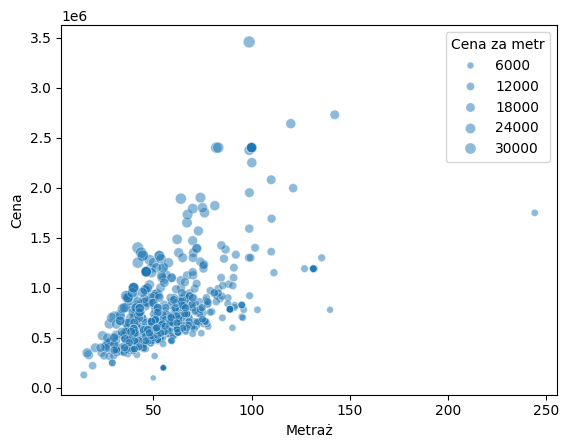

In [14]:
plot(df, df['Sq_Footage'], df['Price'])

In [15]:
def mean_squared_error(X, y, w, b):
	sum = 0
	for i in range(m):
		fw_b = w * X[i] + b
		sum += (fw_b - y[i]) ** 2
	return sum / (2 * m)

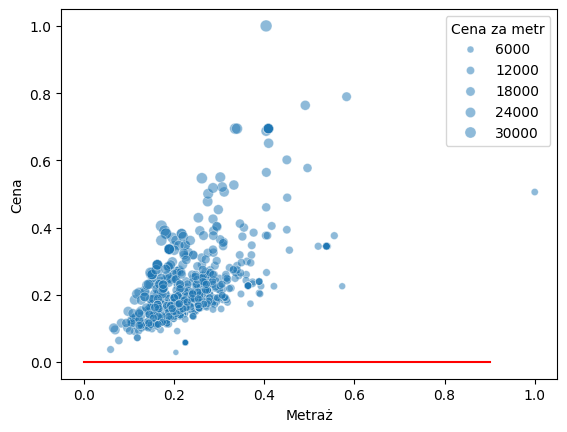

In [16]:
# COST FUNCTION (MEAN SQUARED ERROR)

X = df['Sq_Footage'].values
max_footage = np.max(X)
X = X / max_footage

y = df['Price'].values
max_price = np.max(y)
y = y / max_price

w = 0
b = 0

mean_squared_error(X, y, w, b)
plot(df, X, y, w, b)

In [17]:
# GRADIENT DESCENT

w = 0
b = 0

alpha = 0.1
for i in range(1000):
	w = w - alpha * (np.sum((w * X + b - y) * X) / m)
	b = b - alpha * (np.sum(w * X + b - y) / m)
print(w, b)

0.4096212867033334 0.12159713293510566


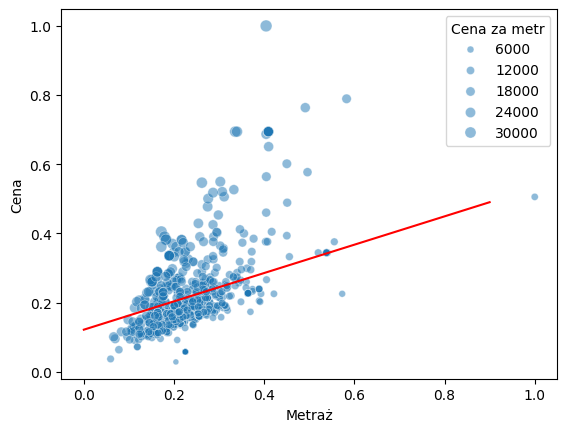

In [18]:
# PLOT AFTER GRADIENT DESCENT

plot(df, X, y, w, b)

In [20]:
# COME BACK TO PAST VALUES
X = X * max_footage
y = y * max_price

array([ 595000.,  549000., 1190000.,  560000.,  889000.,  859000.,
        740000.,  199000.,  388904.,  469102.,  393400.,  468154.,
       1320000.,  785000.,  629000.,  559000.,  788242.,  731440.,
        579000.,  698000., 1399000.,  644972.,  469298.,  744378.,
        857414.,  463724.,  584999.,  660000.,  585000.,  703471.,
        658900.,  640000.,  553000., 1200000.,  590000.,  757000.,
        929000.,  780000.,  404000.,  795000., 2400000.,  737500.,
        679000.,  869000., 2400000.,  340000.,  555000.,  999000.,
        640000.,  689000.,  599000.,  429524., 1160000.,  660000.,
        757000.,  698000.,  814396.,  575000.,  436500., 2400000.,
       1749000.,  330000.,  645000.,  385000.,  659000.,  699000.,
        549000.,  679000.,  563410., 1200000.,  553320.,  654690.,
        652002.,  399000.,  737500.,  379000.,  889000.,  779000.,
        585000., 2400000.,  600000.,  629000.,  482450.,  549000.,
        735000.,  590000.,  839900.,  699000.,  899000.,  5500

In [21]:
def predict(x, w, b):
	return w * x + b

In [36]:
first_row = df.iloc[0]
first_row

Title              Komfortowe mieszkanie w stylu glamour, 2 tarasami
Price                                                       595000.0
Sq_Footage                                                      51.5
Price_Per_Meter                                              11553.4
Name: 0, dtype: object

In [37]:
square_footage = first_row['Sq_Footage']
predict(square_footage, w, b)

21.217093398156777